Comprehensive EDA, class consolidation and SVM

In [1]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import zscore
import fasttext
import os
%matplotlib inline



In [2]:
# read the data
data = pd.read_csv('music_genre.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [4]:
data[data.isnull().any(axis=1)]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:


data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [6]:
data.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


In [7]:
data.describe(include=['O'])

,artist_name,track_name,key,mode,tempo,obtained_date,music_genre
count,50000,50000,50000,50000,50000,50000,50000
unique,6863,41699,12,2,29394,5,10
top,empty_field,Home,G,Major,?,4-Apr,Electronic
freq,2489,16,5727,32099,4980,44748,5000


We can see that there are 17 features and one label column (music_genre). Out of the features, 12 are numerical (one of which, tempo, is missclassified and will be dealt with later), and 5 are categorical.
We can also already see hints to hidden missing values in 3 features ('tempo', 'artist_name' and 'duration_ms'). Those will be dealt with shortly one by one

In [8]:
# check if the data is balanced
data['music_genre'].value_counts()

Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: music_genre, dtype: int64


There are 10 different genres with equal distribution (balanced data). This means the accuracy score will be a good metric to use


Exploring the features one by one:



Instance_id:


In [9]:
data = data.drop(columns=['instance_id'])


Artist's Names:


In [10]:


print(f"There are {data['artist_name'].nunique()} unique artists in the set")



There are 6863 unique artists in the set


In [11]:
data['artist_name'].describe()

count           50000
unique           6863
top       empty_field
freq             2489
Name: artist_name, dtype: object

In [12]:


missing_artist = data[data['artist_name'] == 'empty_field']
missing_artist.head()



,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
19,empty_field,7th Sevens,50.0,0.0281,0.656,307328.0,0.653,0.858000,F#,0.1120,-11.883,Minor,0.0396,117.999,4-Apr,0.199,Electronic
25,empty_field,Revolution,34.0,0.0236,0.715,221050.0,0.978,0.000493,D,0.2160,-1.538,Major,0.3620,125.109,4-Apr,0.418,Electronic
44,empty_field,World (The Price Of Love) - [Radio Edit] [2015...,31.0,0.0035,0.595,222147.0,0.904,0.003780,D,0.0533,-6.805,Minor,0.0349,127.61,4-Apr,0.841,Electronic
128,empty_field,Down With Me - VIP,32.0,0.0139,0.498,-1.0,0.945,0.647000,F,0.3380,-0.003,Minor,0.1370,149.888,4-Apr,0.179,Electronic
135,empty_field,Olvidela Compa,44.0,0.1530,0.792,265133.0,0.549,0.379000,F,0.3430,-9.855,Major,0.0456,120.01299999999999,4-Apr,0.476,Electronic


In [13]:


print(f"Percent of missing artist names: {(missing_artist.shape[0]/data.shape[0])*100:2.4}%")



Percent of missing artist names: 4.978%



5% of the observations are missing the artist's names (marked as 'empty_field'), but these entries are still valid otherwise. we will not drop these observations

In [14]:


data[data['artist_name'] != 'empty_field'].groupby('artist_name')['music_genre'].nunique().value_counts(normalize=False)



1    5488
2    1174
3     191
4       9
Name: music_genre, dtype: int64

For the entries that do contain an artist's name, it seems that a song that comes from a particular artist has an ~80% chance of belonging to one specific genre.

However, in it's current form it's not helpful for classifying songs from artists outside the training set. We'll need to extract more general features, starting with the simplest - name length.¶

In [15]:


# find the length of the artists names
data['length_name'] = data['artist_name'].str.len()



In [16]:


data[data['artist_name'] != 'empty_field'].groupby('music_genre')['length_name'].describe()



,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,4728.0,11.397631,4.898169,1.0,8.0,11.0,14.0,46.0
Anime,4728.0,12.198604,5.419303,2.0,8.0,12.0,15.0,35.0
Blues,4745.0,13.544573,5.425815,1.0,10.0,12.0,16.0,40.0
Classical,4734.0,16.336502,4.489369,4.0,13.0,15.0,20.0,52.0
Country,4779.0,12.656623,3.277890,3.0,11.0,12.0,14.0,41.0
Electronic,4777.0,9.734561,4.199621,2.0,7.0,9.0,12.0,26.0
Hip-Hop,4755.0,9.376025,3.986559,2.0,6.0,9.0,12.0,36.0
Jazz,4770.0,12.504193,4.777946,3.0,10.0,12.0,15.0,51.0
Rap,4737.0,9.645134,4.028050,2.0,7.0,9.0,12.0,38.0


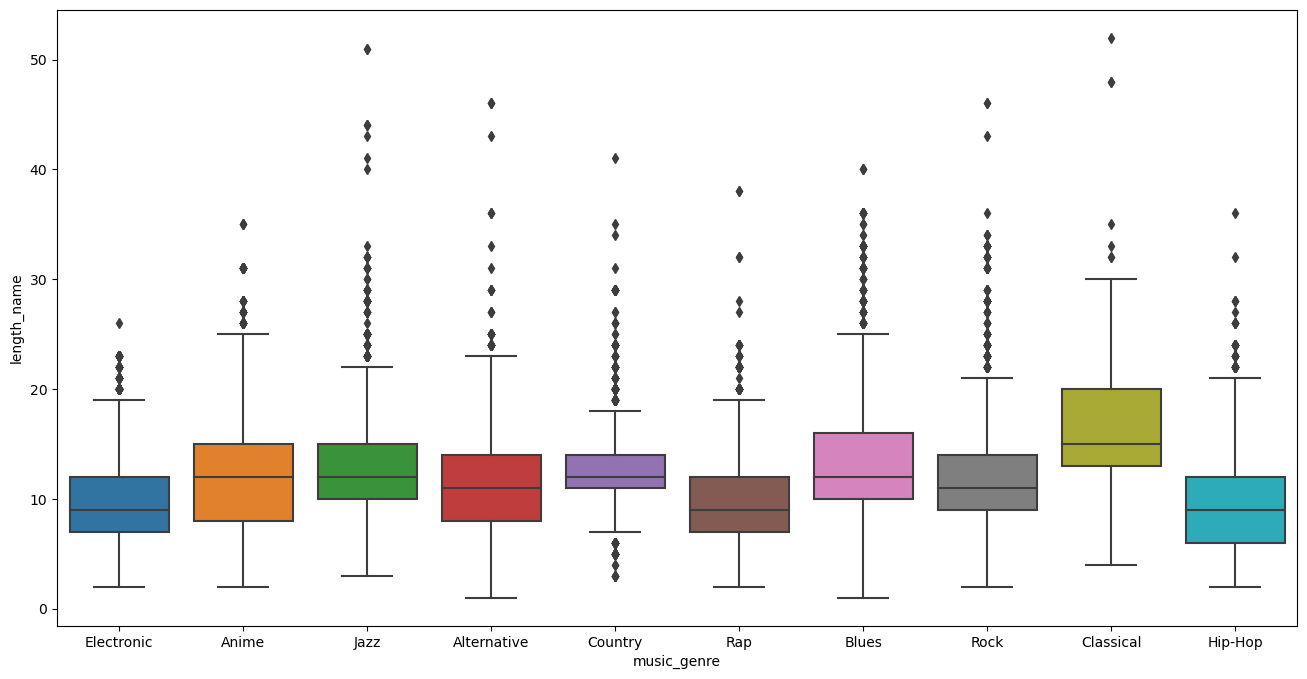

In [17]:


plt.figure(figsize=(16,8))
sns.boxplot(data=data[data['artist_name'] != 'empty_field'], x='music_genre', y='length_name')
plt.show()




From the above statistics it seems that classical music tends to have noticeably longer names. Could potentialy be a useful feature. We'll keep it in for now

In [18]:
data['track_name'].describe()

count     50000
unique    41699
top        Home
freq         16
Name: track_name, dtype: object

In [19]:


# generate track name length
data['length_track_name'] = data['track_name'].str.len()



In [20]:


data.groupby('music_genre')['length_track_name'].describe()



,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,5000.0,14.9672,10.213549,1.0,9.0,13.0,18.0,127.0
Anime,5000.0,15.4680,12.620746,1.0,7.0,12.0,19.0,112.0
Blues,5000.0,19.9576,13.233111,1.0,12.0,17.0,24.0,119.0
Classical,5000.0,48.2104,27.889749,3.0,26.0,47.0,65.0,250.0
Country,5000.0,18.7490,11.491441,1.0,11.0,16.0,23.0,116.0
Electronic,5000.0,17.1644,11.713053,1.0,8.0,13.0,23.0,125.0
Hip-Hop,5000.0,16.4510,12.525613,1.0,8.0,12.0,21.0,139.0
Jazz,5000.0,18.0034,12.456967,1.0,10.0,15.0,22.0,142.0
Rap,5000.0,16.2834,11.908528,1.0,8.0,13.0,21.0,139.0


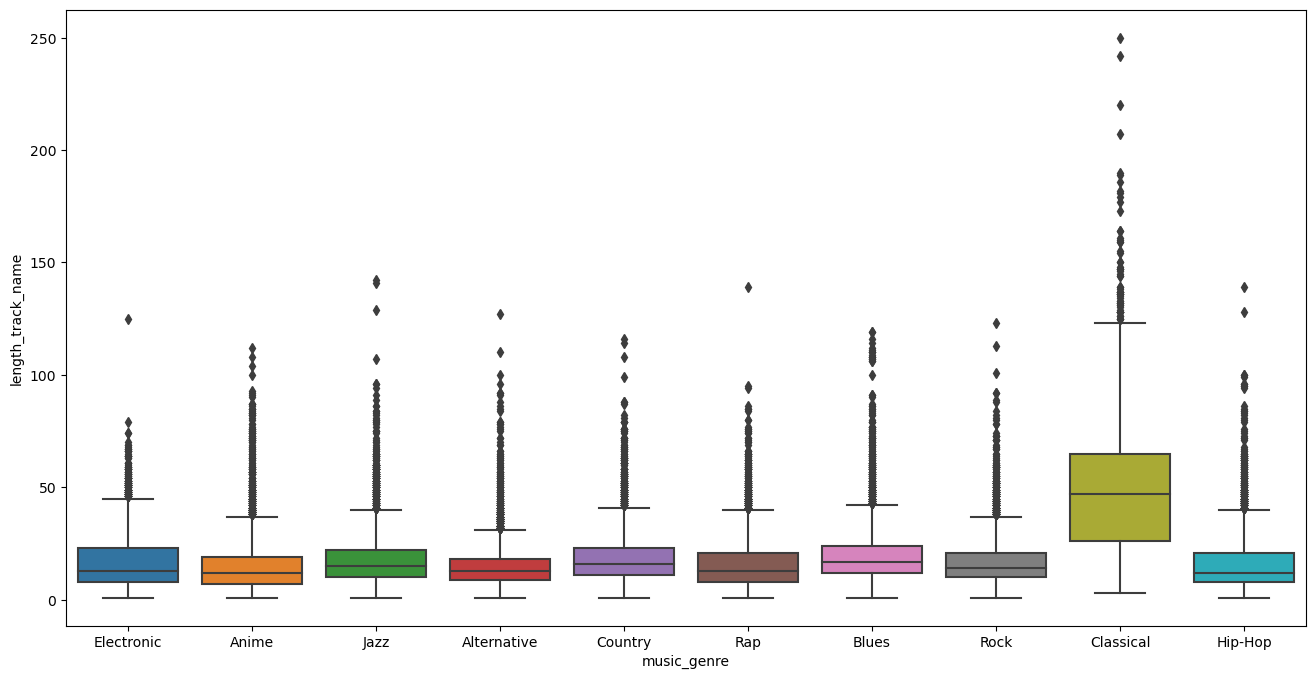

In [21]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data, x='music_genre', y='length_track_name')
plt.show()

The classical genre also has longer track names. The difference is much more pronounced than for the artist's name. This is a better feature for us to use, since it doesn't have the missing values problem. We'll use this and not the artist name length feature.¶

In [22]:


# drop 'length_name' feature
data = data.drop(columns = ['length_name'])




Next we'll make a feature out off the sample's language. Specifically, whether it's written in Japanese. This may help us identify the Anime genre, which is likely to contain track/artist names written in the Japanese alphabet, as shown below:


In [23]:
data[data['music_genre'] == 'Anime'].head()

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,length_track_name
5000,Capcom Sound Team,終幕組曲【冒險の終わり】,11.0,0.01540,0.362,429560.0,0.456,0.024100,D,0.2580,-11.355,Minor,0.0376,117.634,4-Apr,0.332,Anime,12
5001,ayaka,そこまで歩いていくよ,26.0,0.82000,0.627,-1.0,0.350,0.000000,G,0.1250,-7.951,Major,0.0291,135.937,4-Apr,0.173,Anime,10
5002,Hachioji P,KiLLER LADY - Eight Mix,29.0,0.00857,0.643,234874.0,0.966,0.003310,A#,0.2550,-3.902,Minor,0.0442,131.982,4-Apr,0.912,Anime,23
5003,LiSA,Bad Sweet Trap,18.0,0.00711,0.585,229147.0,0.991,0.000002,F,0.1100,-2.817,Minor,0.1170,?,4-Apr,0.580,Anime,14
5004,Hiroyuki Sawano,Call Your Name,50.0,0.01450,0.567,268333.0,0.300,0.000000,B,0.0687,-8.421,Minor,0.0291,141.819,4-Apr,0.196,Anime,14


In [24]:
# download pretrained language identification model
os.system(f"wget https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.ftz")

--2023-03-05 16:35:59--  https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.ftz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.74.142, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 938013 (916K) [binary/octet-stream]
Saving to: ‘lid.176.ftz.1’

     0K .......... .......... .......... .......... ..........  5%  210K 4s
    50K .......... .......... .......... .......... .......... 10%  215K 4s
   100K .......... .......... .......... .......... .......... 16%  216K 4s
   150K .......... .......... .......... .......... .......... 21% 10.9M 3s
   200K .......... .......... .......... .......... .......... 27% 9.61M 2s
   250K .......... .......... .......... .......... .......... 32%  220K 2s
   300K .......... .......... .......... .......... .......... 38% 5.58M 2s
   350K .......... .......... .......... .......... ...

0

In [25]:
PRETRAINED_MODEL_PATH = 'lid.176.ftz'
model = fasttext.load_model(PRETRAINED_MODEL_PATH)

In [26]:
def find_japanese(df):
    '''
    returns a 1D-array of 0's ans 1's, as well as the confidence of each prediction.
    1 - if either the artist or track name is written in japanese.
    0 - otherwise
    ''' 
    jap = []
    confidence = []
    
    for _, row in df.iterrows():      
        pred_track, confidence_track = model.predict(row['track_name'])
        pred_track = pred_track[0].split('__')[-1]
        pred_artist, confidence_artist = model.predict(row['artist_name'])
        pred_artist = pred_artist[0].split('__')[-1]

        # check the confidence of the language detection
        if (pred_track == 'ja') or (pred_artist == 'ja'):
            jap.append(1)
            confidence.append(np.max([confidence_track[0], confidence_artist[0]]))
        else:
            jap.append(0)
    
    return jap, np.array(confidence)

In [27]:
data['Japanese'], confidence = find_japanese(data[['artist_name', 'track_name']])

In [28]:
print(f"The average confidence level for the japanese predictions is {confidence.mean():1.2} +\- {confidence.std():1.2}")

The average confidence level for the japanese predictions is 0.9 +\- 0.17


In [29]:
data.groupby('music_genre')['Japanese'].value_counts(normalize=True)

music_genre  Japanese
Alternative  0           0.9960
             1           0.0040
Anime        0           0.7900
             1           0.2100
Blues        0           0.9980
             1           0.0020
Classical    0           0.9932
             1           0.0068
Country      0           0.9996
             1           0.0004
Electronic   0           0.9980
             1           0.0020
Hip-Hop      0           0.9946
             1           0.0054
Jazz         0           0.9990
             1           0.0010
Rap          0           0.9950
             1           0.0050
Rock         0           0.9980
             1           0.0020
Name: Japanese, dtype: float64

More than 20% of the Anime tracks are indeed written in Japanese, a much higher percentage than all the other music genres combined. This could indeed help us identify the Anime genre.

In [30]:


data = data.drop(columns=['artist_name', 'track_name'])



Popularity

In [31]:
data.groupby('music_genre')['popularity'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,5000.0,50.2242,7.664260,0.0,45.00,49.0,55.0,83.0
Anime,5000.0,24.2716,9.675151,0.0,17.00,23.0,30.0,65.0
Blues,5000.0,34.8040,9.716422,0.0,28.75,33.0,39.0,80.0
Classical,5000.0,29.3158,14.100519,0.0,25.00,32.0,38.0,68.0
Country,5000.0,46.0100,9.771540,0.0,39.00,44.0,52.0,82.0
Electronic,5000.0,38.1118,9.715378,0.0,31.00,37.0,44.0,96.0
Hip-Hop,5000.0,58.3996,8.302271,18.0,52.00,57.0,63.0,96.0
Jazz,5000.0,40.9286,9.517333,0.0,36.00,40.0,46.0,79.0
Rap,5000.0,60.4974,8.160620,14.0,55.00,59.0,65.0,99.0


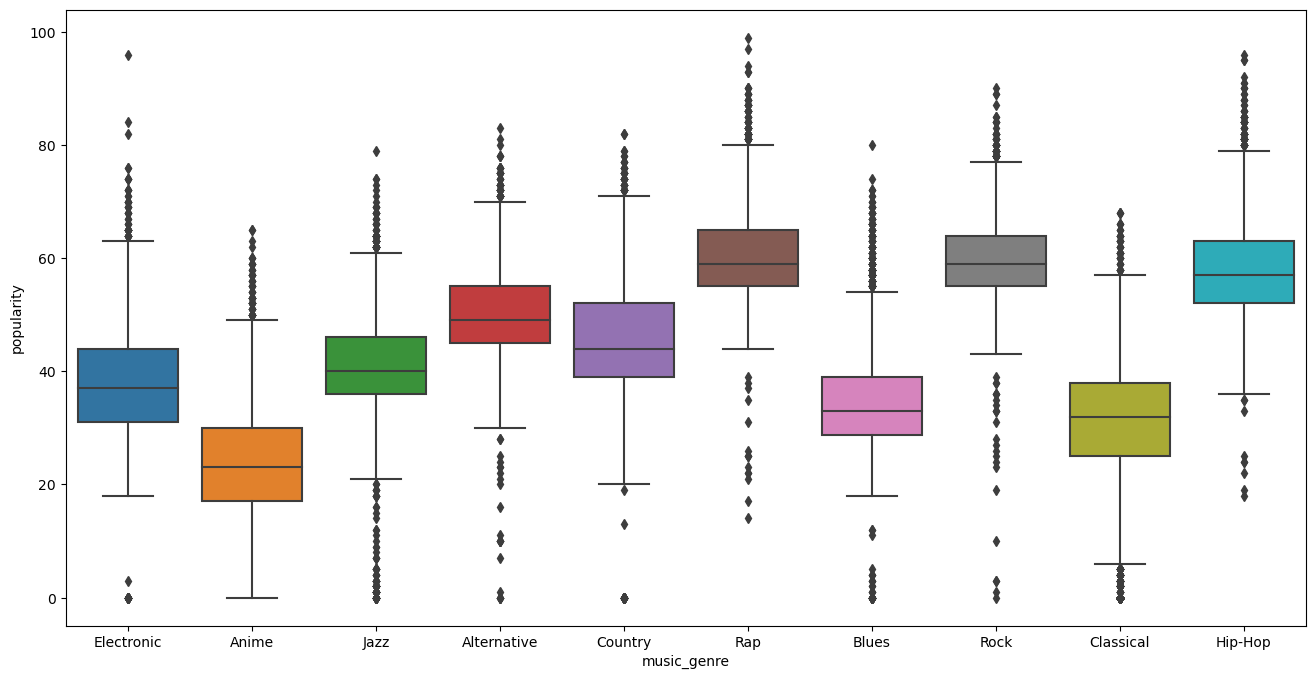

In [32]:


plt.figure(figsize=(16,8))
sns.boxplot(data=data, x='music_genre', y='popularity')
plt.show()



This feature shows a nice spread of distributions for the different genres. Could definitely be useful for classification.

Rap, Hip-Hop and Rock seem to be the most popular genres, while Anime, Blues and Classical are the least popular. The other 4 genres are somewhere in between.

Acousticness:

In [33]:
data.groupby('music_genre')['acousticness'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,5000.0,0.164983,0.242942,0.000001,0.002087,0.03360,0.24000,0.992
Anime,5000.0,0.286968,0.362371,0.000000,0.005193,0.06650,0.57600,0.996
Blues,5000.0,0.317830,0.306287,0.000002,0.037875,0.21500,0.55725,0.996
Classical,5000.0,0.869139,0.256728,0.000001,0.909000,0.96700,0.98800,0.996
Country,5000.0,0.268827,0.262072,0.000028,0.046525,0.17500,0.43425,0.981
Electronic,5000.0,0.121971,0.201634,0.000002,0.004060,0.02620,0.14000,0.985
Hip-Hop,5000.0,0.179093,0.189449,0.000015,0.033900,0.10900,0.26700,0.985
Jazz,5000.0,0.494564,0.338640,0.000002,0.153000,0.51500,0.81900,0.996
Rap,5000.0,0.169057,0.192257,0.000007,0.024675,0.09385,0.25300,0.945


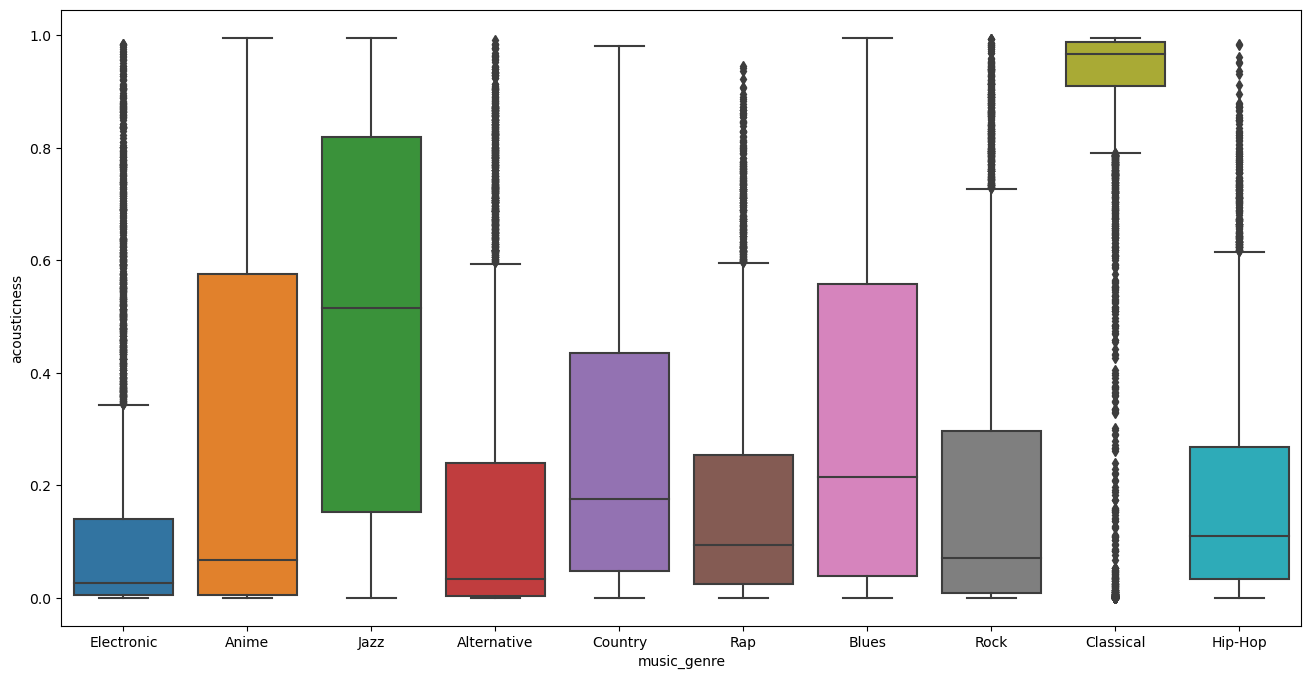

In [34]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data, x='music_genre', y='acousticness')
plt.show()

Danceability

In [35]:
data.groupby('music_genre')['danceability'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,5000.0,0.541124,0.150073,0.0617,0.44100,0.539,0.64300,0.971
Anime,5000.0,0.471002,0.148760,0.0606,0.37900,0.488,0.57800,0.905
Blues,5000.0,0.529243,0.144694,0.1180,0.42600,0.529,0.63500,0.967
Classical,5000.0,0.306560,0.135138,0.0600,0.19800,0.301,0.40200,0.775
Country,5000.0,0.577316,0.108931,0.2030,0.50900,0.581,0.64725,0.953
Electronic,5000.0,0.619220,0.147034,0.0822,0.52900,0.629,0.72400,0.979
Hip-Hop,5000.0,0.717373,0.130400,0.2300,0.64000,0.733,0.81400,0.986
Jazz,5000.0,0.584736,0.159487,0.0596,0.47200,0.600,0.70500,0.976
Rap,5000.0,0.696605,0.140232,0.1970,0.60200,0.714,0.80100,0.977


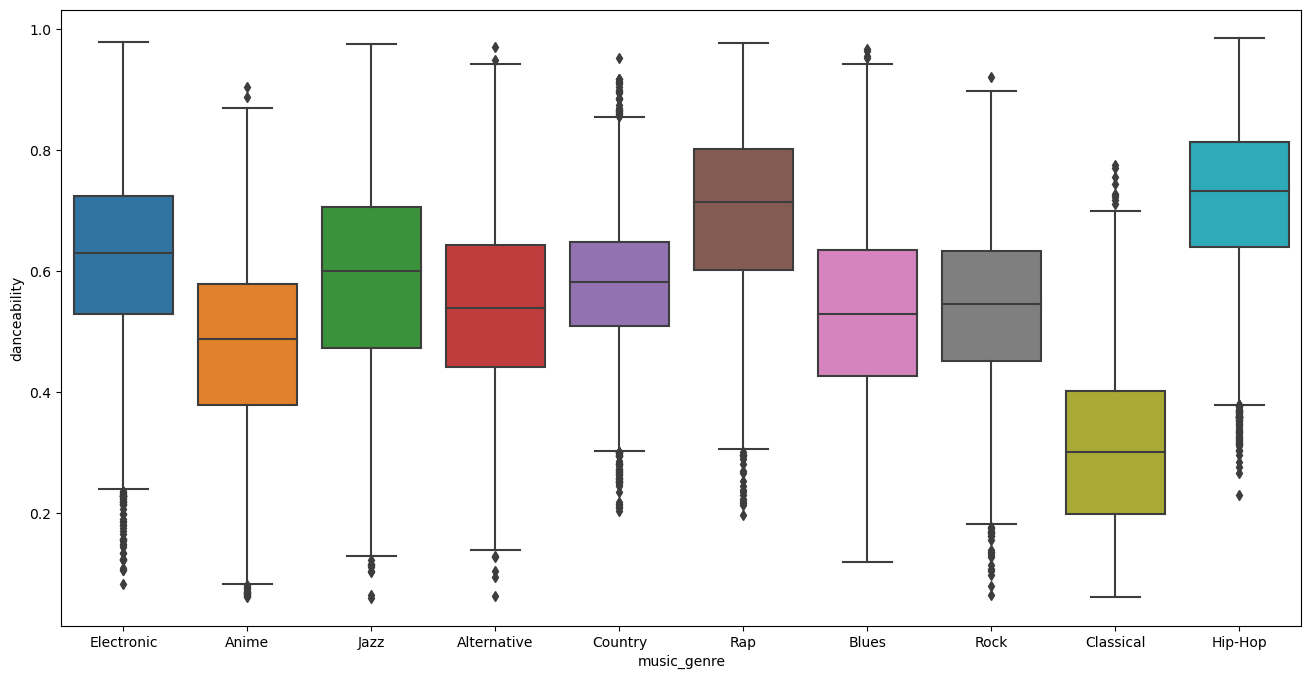

In [36]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data, x='music_genre', y='danceability')
plt.show()


Classical music sticks out again, but Rap and Hip-Hop can also be distinguished from the rest (they seem to go together often).


Duration

In [37]:
data.groupby('music_genre')['duration_ms'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,5000.0,210404.8078,90366.002886,-1.0,185994.75,219561.5,255583.00,675653.0
Anime,5000.0,208880.8290,105275.946177,-1.0,146250.25,230205.5,272993.25,1295600.0
Blues,5000.0,229301.0962,131931.237262,-1.0,171910.00,221140.0,280033.25,2019293.0
Classical,5000.0,278014.3464,219698.722816,-1.0,148770.25,241640.0,362070.25,3195440.0
Country,5000.0,195556.0686,77252.730320,-1.0,179328.25,207073.5,233839.25,599315.0
Electronic,5000.0,244553.3832,164125.128913,-1.0,192655.50,236888.0,300000.00,4830606.0
Hip-Hop,5000.0,198395.9458,86465.775861,-1.0,167707.00,209056.0,248627.00,723573.0
Jazz,5000.0,238092.4468,133485.337615,-1.0,170491.00,236040.0,304278.50,1352413.0
Rap,5000.0,196508.7920,85618.048197,-1.0,168339.00,207509.5,244454.25,579293.0



-1.0 is obvously not a valid time measurement. These are missing values.¶


In [38]:
miss_duration = data[data['duration_ms'] == -1].shape[0]
num_obs_tot = data.shape[0]
print(f"There are {miss_duration} missing values, which accounts for {(miss_duration/num_obs_tot)*100:2.4}% of the data points.")

There are 4939 missing values, which accounts for 9.878% of the data points.


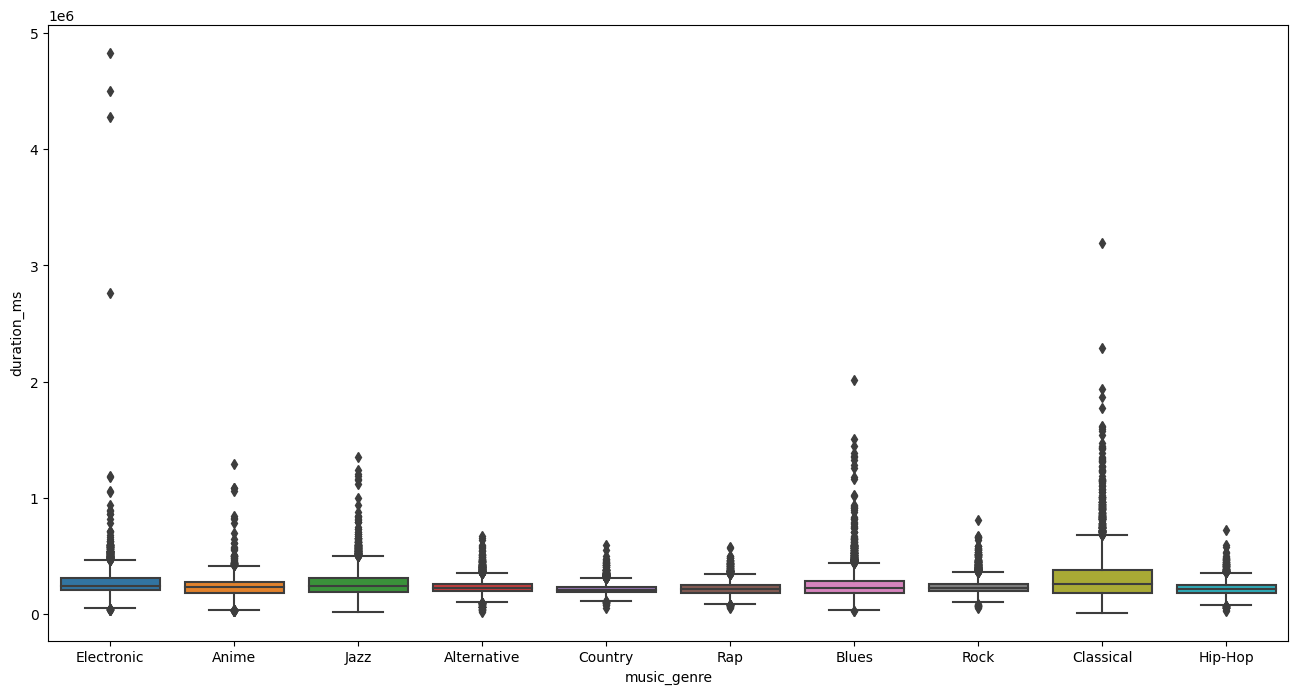

In [39]:


plt.figure(figsize=(16,8))
sns.boxplot(data=data[data['duration_ms'] != -1], x='music_genre', y='duration_ms')
plt.show()



Almost 10% of the entries are missing a duration. We don't want to remove such a large amount of observations, so we'll fill in the missing values with the median, but consider removing the feature entirely in the future.
Also of note is the fact that this feature contains extreme outliers. They could be important for classification, but we'll consider removing them at a later stage¶

In [40]:


# fill in median for missing values
mask_duration = data['duration_ms'] != -1
median_duration = data.loc[mask_duration, 'duration_ms'].median()
data.loc[~mask_duration, 'duration_ms'] = median_duration



Energy

In [41]:
data.groupby('music_genre')['energy'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,5000.0,0.710880,0.206841,0.048400,0.55700,0.7470,0.89025,0.998
Anime,5000.0,0.664568,0.300289,0.000943,0.42200,0.7830,0.92500,0.999
Blues,5000.0,0.609753,0.227894,0.009570,0.44400,0.6290,0.80000,0.998
Classical,5000.0,0.176534,0.225583,0.000792,0.03660,0.1010,0.20700,0.994
Country,5000.0,0.638903,0.199112,0.021000,0.49800,0.6700,0.80400,0.991
Electronic,5000.0,0.738636,0.187862,0.021100,0.61100,0.7730,0.89700,0.999
Hip-Hop,5000.0,0.644334,0.150461,0.095200,0.54175,0.6475,0.75300,0.995
Jazz,5000.0,0.474847,0.239362,0.002110,0.28900,0.4780,0.65700,0.997
Rap,5000.0,0.651301,0.156123,0.079300,0.54275,0.6490,0.76300,0.997


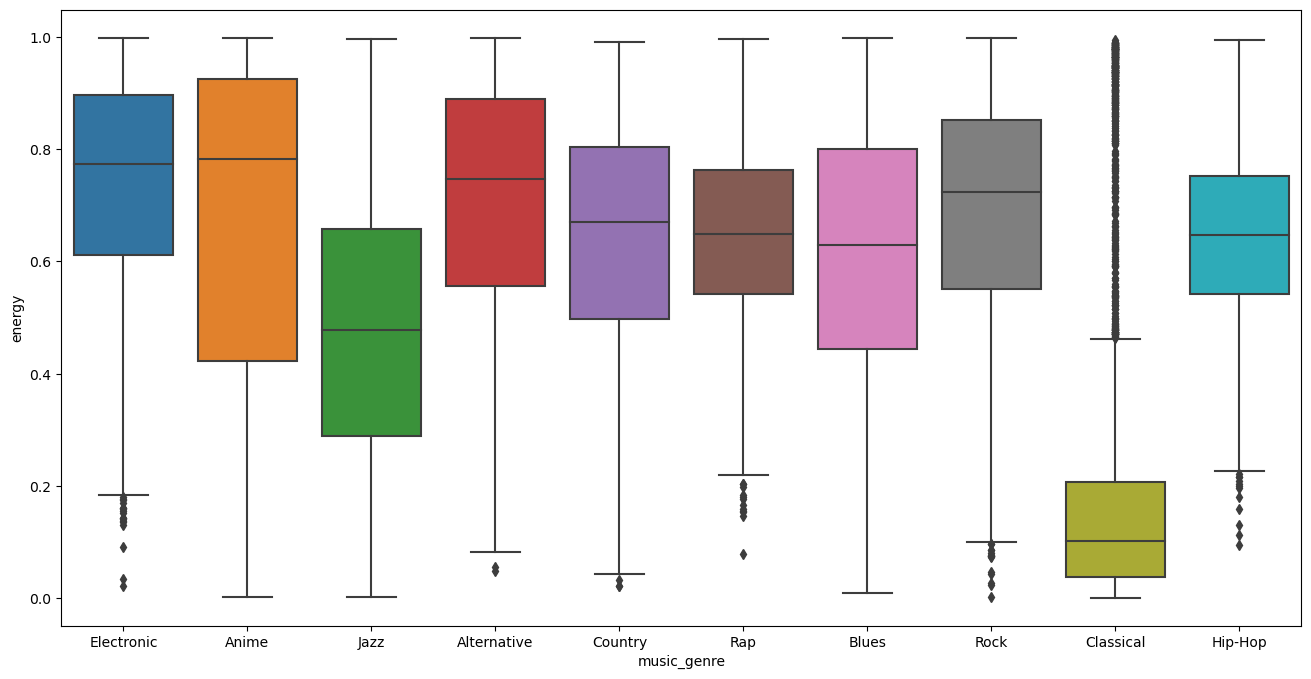

In [42]:


plt.figure(figsize=(16,8))
sns.boxplot(data=data, x='music_genre', y='energy')
plt.show()




As usual, classical music stands out (and Jazz to a much lesser degree). Rap and Hip-Hop still match each other.


Instrumentalness

In [43]:


data.groupby('music_genre')['instrumentalness'].describe()



,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,5000.0,0.060818,0.174351,0.0,0.00000,0.000068,0.006600,0.942
Anime,5000.0,0.278057,0.390610,0.0,0.00000,0.000400,0.768000,0.996
Blues,5000.0,0.094134,0.213205,0.0,0.00001,0.000957,0.038000,0.966
Classical,5000.0,0.600692,0.378027,0.0,0.14875,0.832000,0.905000,0.994
Country,5000.0,0.005320,0.041110,0.0,0.00000,0.000000,0.000039,0.880
Electronic,5000.0,0.348139,0.361742,0.0,0.00316,0.182000,0.749250,0.986
Hip-Hop,5000.0,0.010836,0.073129,0.0,0.00000,0.000000,0.000011,0.927
Jazz,5000.0,0.354271,0.383342,0.0,0.00017,0.120500,0.797000,0.985
Rap,5000.0,0.009084,0.065314,0.0,0.00000,0.000000,0.000010,0.922


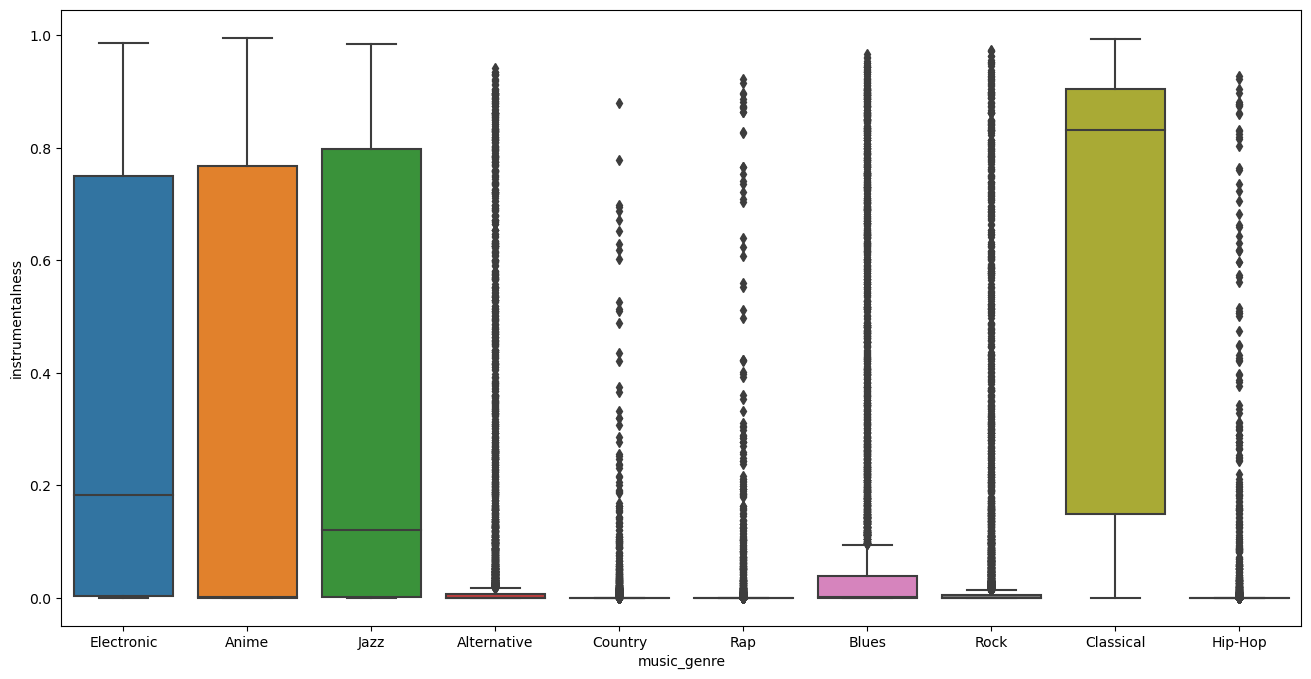

In [44]:


plt.figure(figsize=(16,8))
sns.boxplot(data=data, x='music_genre', y='instrumentalness')
plt.show()



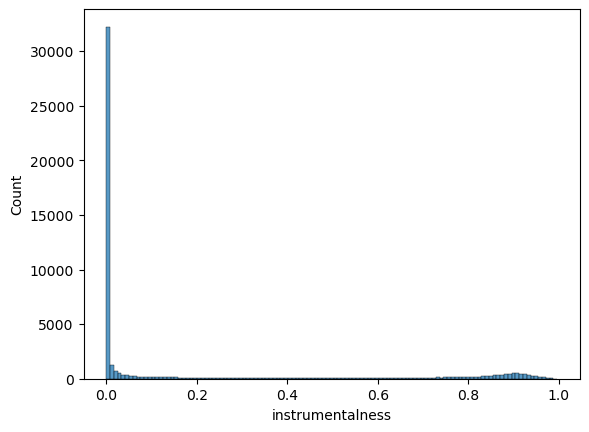

In [45]:
sns.histplot(x='instrumentalness',data=data);

In [46]:
inst_0 = data[data['instrumentalness'] == 0].shape[0]
num_obs = data.shape[0]
print(f"There are {inst_0} observations with 0.0 instrumentalness, which accounts for {(inst_0/num_obs)*100:2.4}% of the data points")

There are 15001 observations with 0.0 instrumentalness, which accounts for 30.0% of the data points


Such a large number of 0.0 entries likely indicates missing values rather than real data points. Since this is a 3rd of our observations, we won't fill in missing values. Instead, we'll discard this feature entirely.

In [47]:
data = data.drop(columns=['instrumentalness'])

Key

In [48]:
data['key'].unique()

array(['A#', 'D', 'G#', 'C#', 'F#', 'B', 'G', 'F', 'A', 'C', 'E', 'D#'],
      dtype=object)

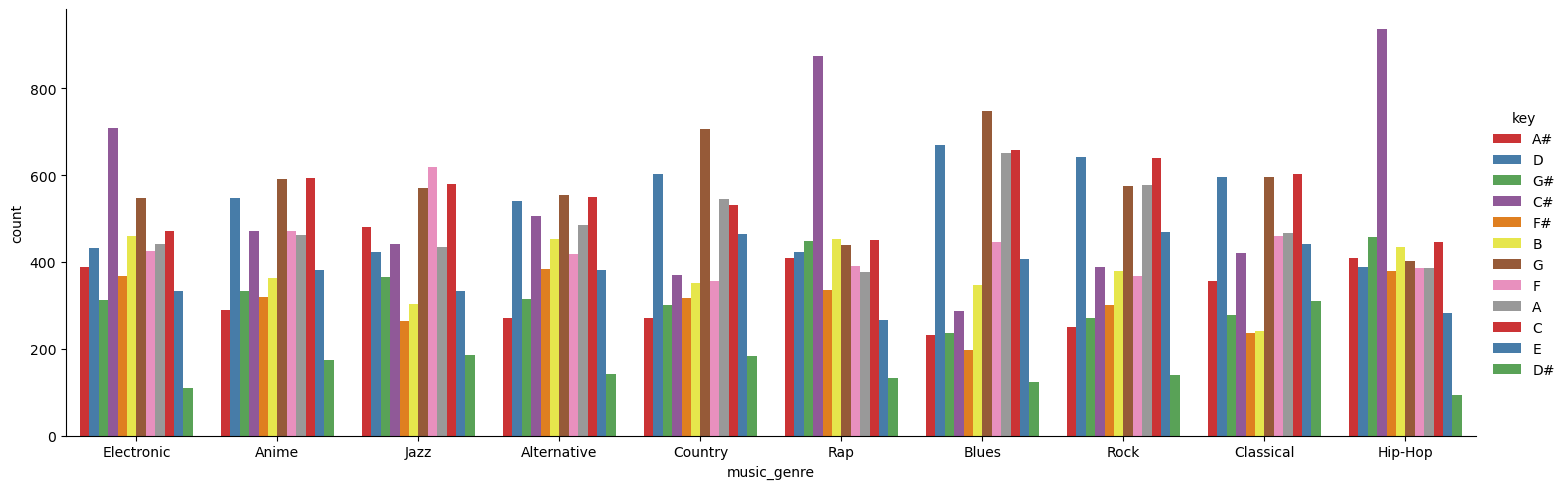

In [49]:
sns.catplot(x="music_genre", hue="key",data=data, kind="count",height=5, aspect=3.0, palette = 'Set1');

In [50]:
data.groupby('music_genre')['key'].describe()

,count,unique,top,freq
music_genre,,,,
Alternative,5000,12,G,555
Anime,5000,12,C,594
Blues,5000,12,G,747
Classical,5000,12,C,602
Country,5000,12,G,707
Electronic,5000,12,C#,709
Hip-Hop,5000,12,C#,936
Jazz,5000,12,F,619
Rap,5000,12,C#,874


In [51]:


# One Hot Encoding
data = pd.get_dummies(data, drop_first=True, prefix='key', columns=['key'])




Different genres have noticeably different spreads. We'll keep this feature, but use One Hot Encoding to make it useful.


Liveness

In [52]:
data.groupby('music_genre')['liveness'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,5000.0,0.197119,0.156115,0.02120,0.099000,0.132,0.25600,0.996
Anime,5000.0,0.193444,0.138930,0.01690,0.098800,0.137,0.27525,0.967
Blues,5000.0,0.233206,0.220590,0.00967,0.097700,0.139,0.28600,1.000
Classical,5000.0,0.161046,0.143591,0.02250,0.088975,0.110,0.15700,0.987
Country,5000.0,0.187781,0.153594,0.02120,0.098600,0.128,0.23100,0.986
Electronic,5000.0,0.209782,0.176166,0.01730,0.095800,0.129,0.28325,0.984
Hip-Hop,5000.0,0.200870,0.153262,0.01960,0.103000,0.136,0.26200,0.989
Jazz,5000.0,0.171721,0.147107,0.01880,0.094200,0.115,0.18300,0.986
Rap,5000.0,0.198035,0.151165,0.02080,0.103000,0.135,0.25400,0.989


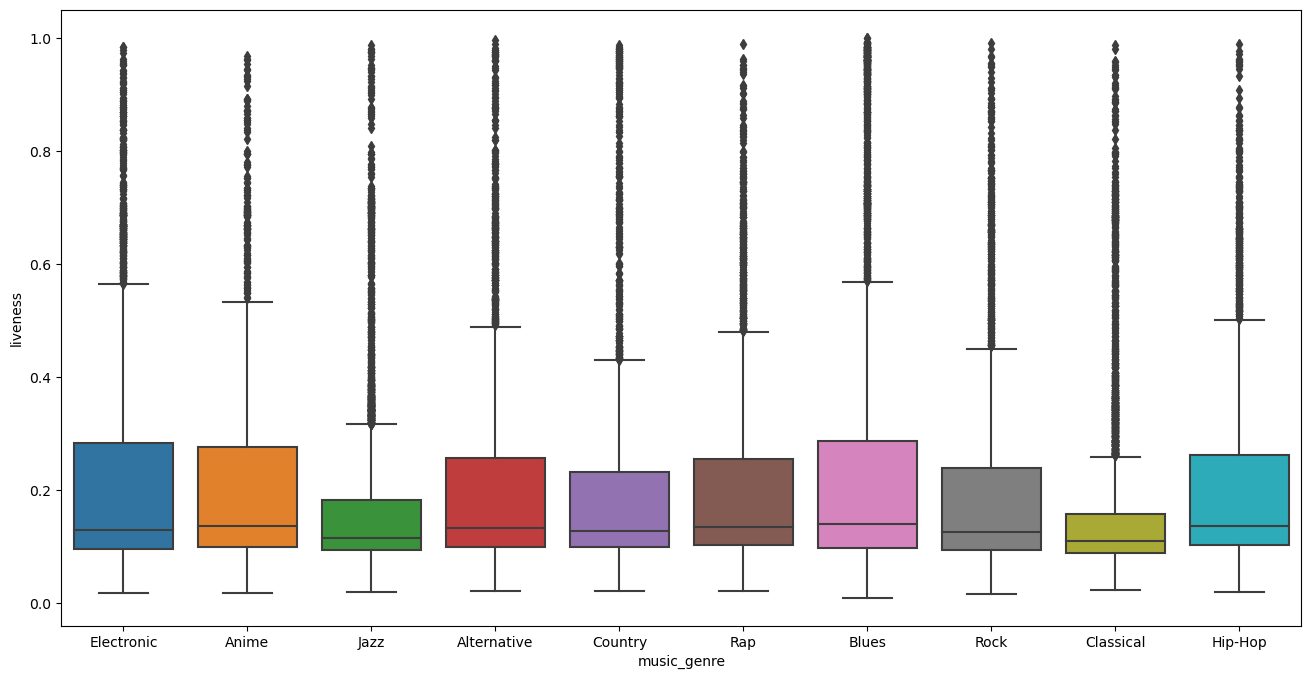

In [53]:


plt.figure(figsize=(16,8))
sns.boxplot(data=data, x='music_genre', y='liveness')
plt.show()



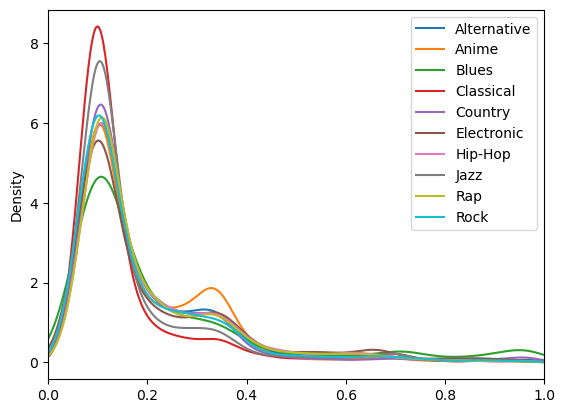

In [54]:
data.groupby('music_genre')['liveness'].plot.kde()
plt.legend()
plt.xlim([0,1])
plt.show()


The distributions seem similarly skewed for all genres, so this feature will likely not contribute much to the model. We'll try both with and without this feature.


Loudness

In [55]:
data.groupby('music_genre')['loudness'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,5000.0,-6.517714,2.767036,-22.191,-7.98250,-5.9930,-4.50000,1.342
Anime,5000.0,-7.963515,6.246825,-41.234,-10.69125,-5.6605,-3.58900,1.893
Blues,5000.0,-9.009528,3.833429,-31.284,-11.31600,-8.4555,-6.17675,3.744
Classical,5000.0,-21.586253,7.730315,-47.046,-26.44300,-21.8725,-17.23300,-2.304
Country,5000.0,-7.297150,3.210097,-27.119,-8.80225,-6.5275,-5.02000,-0.521
Electronic,5000.0,-7.034238,3.683159,-25.582,-9.26050,-6.4650,-4.37600,1.585
Hip-Hop,5000.0,-6.851158,2.457706,-25.602,-8.16025,-6.5090,-5.20350,1.012
Jazz,5000.0,-11.185364,4.662576,-35.200,-13.62125,-10.3455,-7.84350,-1.002
Rap,5000.0,-6.668337,2.427193,-22.589,-7.97650,-6.3550,-5.03775,-0.092


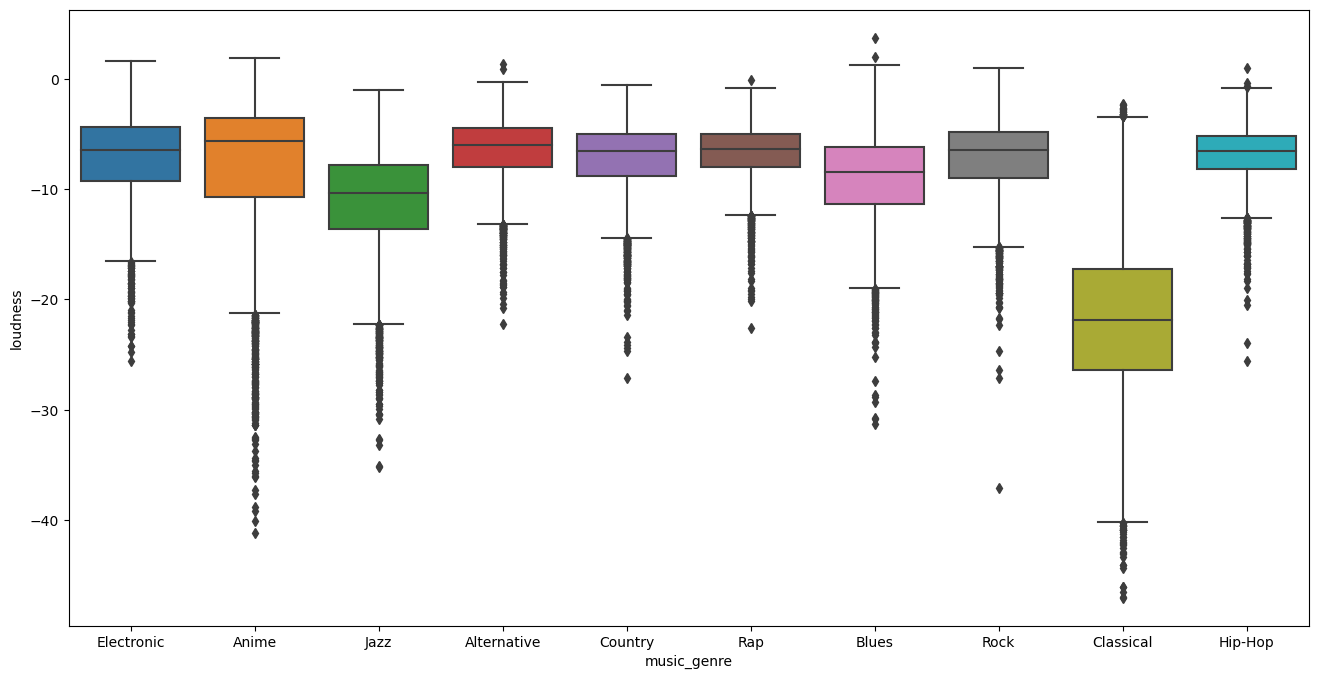

In [56]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data, x='music_genre', y='loudness')
plt.show()


As usual, classical music is far from the rest, with Jazz (and Blues) also differing from the rest somewhat.¶


Mode

In [57]:
data['mode'].unique()

array(['Minor', 'Major'], dtype=object)

In [58]:
data.groupby('music_genre')['mode'].describe()

,count,unique,top,freq
music_genre,,,,
Alternative,5000,2,Major,3167
Anime,5000,2,Major,3101
Blues,5000,2,Major,3563
Classical,5000,2,Major,3328
Country,5000,2,Major,4362
Electronic,5000,2,Major,2692
Hip-Hop,5000,2,Major,2777
Jazz,5000,2,Major,2648
Rap,5000,2,Major,2763


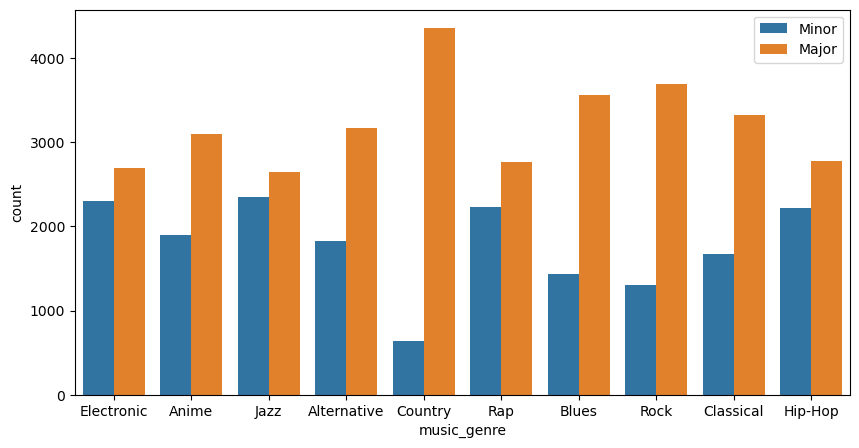

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(x="music_genre", hue="mode",data=data)
plt.legend(loc=0)
plt.show()


All genres seem to have a prefererence for the "Major" mode, but to different degrees. It is the most pronounced in the Country genre. We'll use this feature after one hot encoding.

In [60]:


# One Hot Encoding
data = pd.get_dummies(data, drop_first=True, columns=['mode'])



Speechiness

In [61]:
data.groupby('music_genre')['speechiness'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,5000.0,0.088819,0.092578,0.0231,0.035900,0.0519,0.0969,0.941
Anime,5000.0,0.064608,0.052907,0.0229,0.034800,0.0452,0.0708,0.498
Blues,5000.0,0.062157,0.062483,0.0231,0.033875,0.0431,0.0650,0.942
Classical,5000.0,0.051575,0.037965,0.0239,0.038400,0.0433,0.0506,0.631
Country,5000.0,0.049032,0.048846,0.0223,0.029500,0.0346,0.0456,0.689
Electronic,5000.0,0.098891,0.098593,0.0234,0.040100,0.0575,0.1110,0.774
Hip-Hop,5000.0,0.207044,0.136928,0.0246,0.085450,0.1920,0.2990,0.932
Jazz,5000.0,0.073629,0.081572,0.0226,0.035300,0.0438,0.0676,0.939
Rap,5000.0,0.186707,0.132777,0.0229,0.070100,0.1585,0.2800,0.922


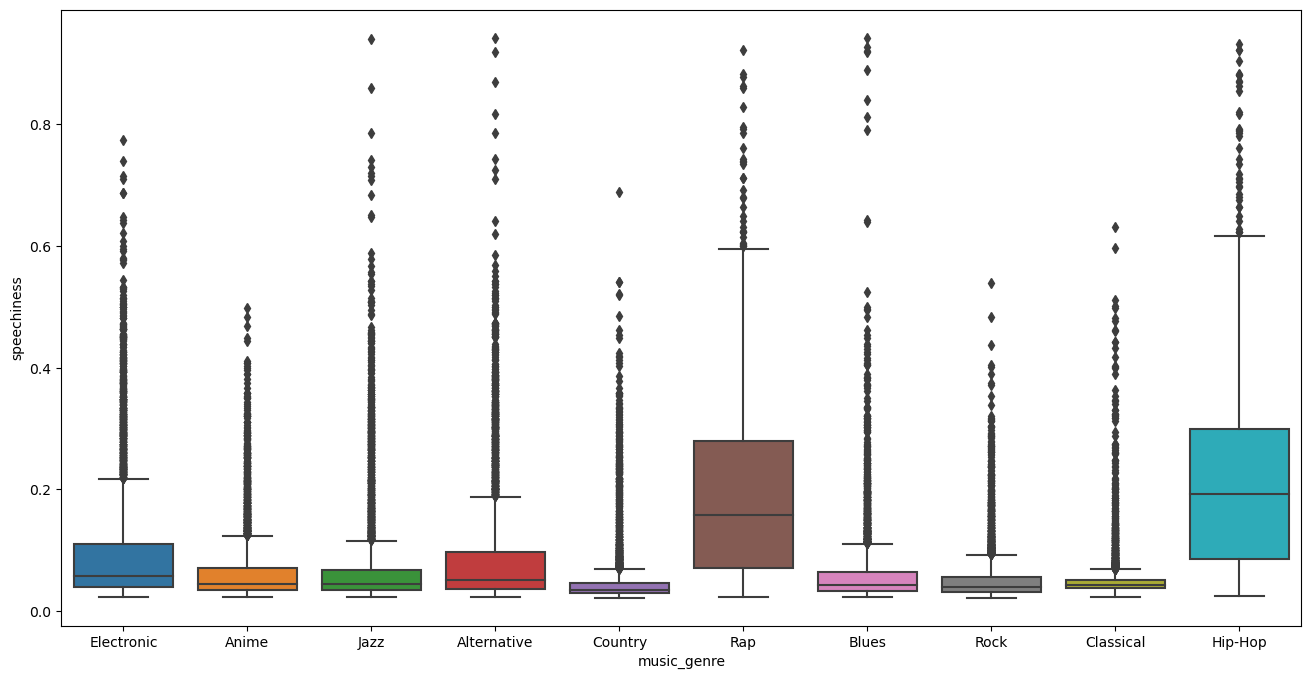

In [62]:


plt.figure(figsize=(16,8))
sns.boxplot(data=data, x='music_genre', y='speechiness')
plt.show()




This feature should contribute especially to identifying Hip-Hop and Rap.


Tempo

In [63]:
data.groupby('music_genre')['tempo'].describe()

,count,unique,top,freq
music_genre,,,,
Alternative,5000,4236,?,505
Anime,5000,4134,?,503
Blues,5000,4376,?,530
Classical,5000,4380,?,500
Country,5000,4233,?,514
Electronic,5000,3644,?,534
Hip-Hop,5000,4115,?,480
Jazz,5000,4302,?,479
Rap,5000,4076,?,496



This feature should be numeric. The "?" is a missing value.


In [64]:


print(f"This feature contains {(data[data['tempo'] == '?'].shape[0]/data.shape[0])*100:2.4}% missing values")



This feature contains 9.96% missing values


In [65]:


# replace "?" with np.nan and correctly classify the feature:
data.loc[data['tempo'] == '?', 'tempo'] = np.nan
data = data.astype({'tempo': np.float64})



In [66]:
data.groupby('music_genre')['tempo'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,4495.0,122.547235,30.222638,44.194,96.98500,120.0530,143.99300,213.788
Anime,4497.0,126.799978,33.063462,47.704,98.96000,127.9720,149.98900,220.276
Blues,4470.0,121.379962,30.326710,47.587,97.64475,118.3720,141.22525,215.918
Classical,4500.0,104.053190,30.944454,34.347,79.23325,96.5515,127.30200,212.923
Country,4486.0,123.784286,30.082410,55.513,99.75675,123.0420,144.67175,217.538
Electronic,4466.0,125.930571,26.482007,35.551,107.83275,125.9830,144.97300,220.041
Hip-Hop,4520.0,120.154134,29.882185,47.092,93.99425,120.2070,141.04025,213.788
Jazz,4521.0,111.699415,29.648000,34.765,90.00300,104.8380,127.99800,213.038
Rap,4504.0,120.585501,29.279738,47.811,95.00900,120.8195,140.74450,207.986


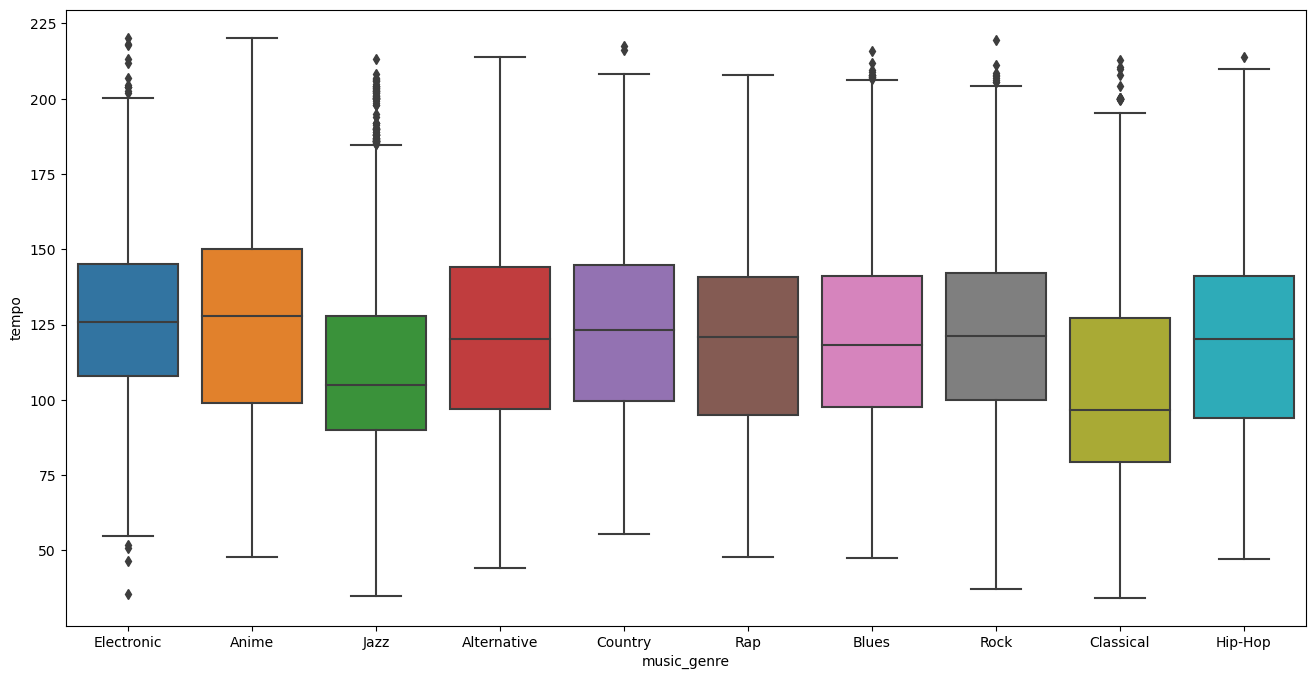

In [67]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data, x='music_genre', y='tempo')
plt.show()



The variation between genres is not great. We'll fill missing values with the median, but consider dropping the feature altogether in the future.¶


In [68]:


median_tempo = data['tempo'].median()
data['tempo'] = data['tempo'].fillna(median_tempo)




Obtained date:¶


In [69]:
data['obtained_date'].unique()

array(['4-Apr', '3-Apr', '5-Apr', '1-Apr', '0/4'], dtype=object)

In [70]:
data.groupby('music_genre')['obtained_date'].describe()

,count,unique,top,freq
music_genre,,,,
Alternative,5000,4,4-Apr,4608
Anime,5000,4,4-Apr,4410
Blues,5000,4,4-Apr,4359
Classical,5000,4,4-Apr,3329
Country,5000,4,4-Apr,4679
Electronic,5000,4,4-Apr,4789
Hip-Hop,5000,4,4-Apr,4740
Jazz,5000,4,4-Apr,4340
Rap,5000,5,4-Apr,4759



Only gives the 4 dates at which the data was obtained. Not useful to us, so we'll drop it.¶


In [71]:
data = data.drop(columns=['obtained_date'])


Valence:

In [72]:
data.groupby('music_genre')['valence'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,5000.0,0.447513,0.216445,0.0342,0.28300,0.4285,0.60000,0.983
Anime,5000.0,0.437670,0.248353,0.0000,0.23200,0.4390,0.63200,0.990
Blues,5000.0,0.580788,0.224741,0.0315,0.41000,0.5900,0.76000,0.985
Classical,5000.0,0.210523,0.197650,0.0000,0.05650,0.1400,0.30525,0.982
Country,5000.0,0.536732,0.221114,0.0396,0.36100,0.5270,0.71625,0.977
Electronic,5000.0,0.389884,0.239673,0.0205,0.18900,0.3585,0.55900,0.992
Hip-Hop,5000.0,0.474927,0.220622,0.0336,0.30300,0.4735,0.64300,0.979
Jazz,5000.0,0.509248,0.251076,0.0289,0.29675,0.5150,0.71100,0.985
Rap,5000.0,0.454999,0.213480,0.0336,0.28900,0.4460,0.61200,0.970


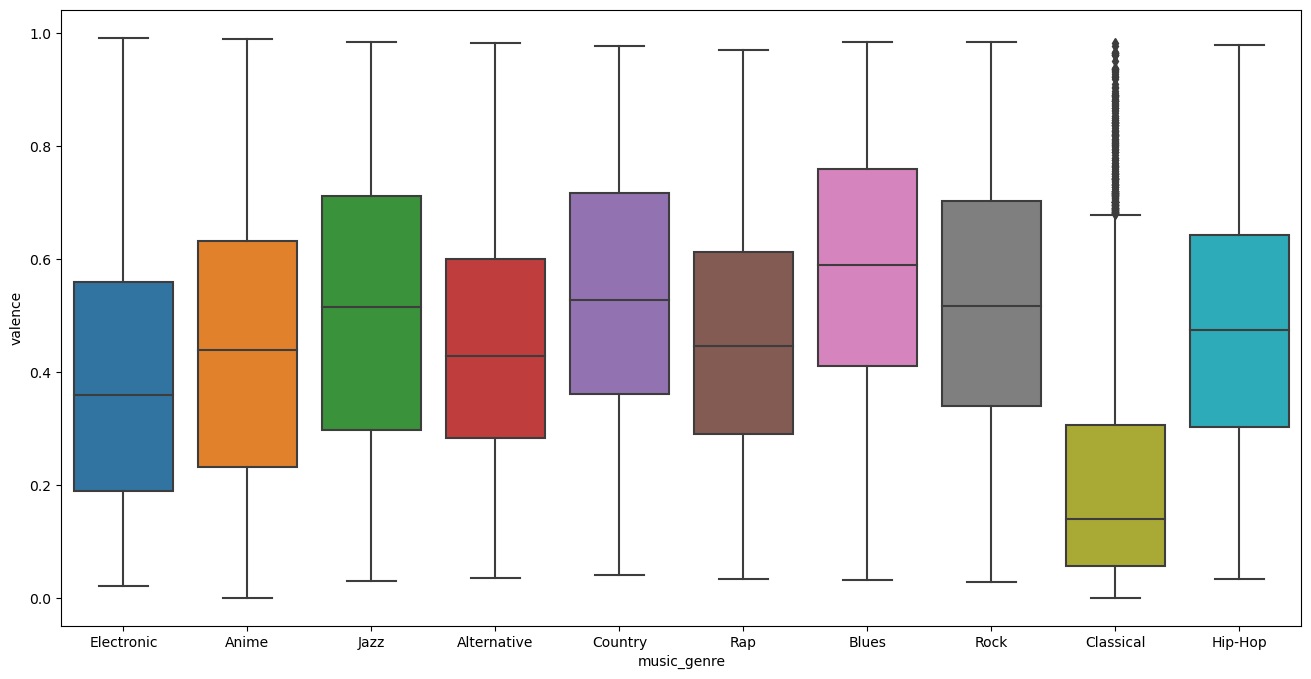

In [73]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data, x='music_genre', y='valence')
plt.show()


Again, only classical music truly stands out from the rest.¶


EDA Summary:

Labels:

There are 10 equally likely musical genres (balanced dataset):

    Alternative
    Anime
    Blues
    Classical
    Country
    Electronic
    Hip-Hop
    Jazz
    Rap
    Rock


Features:

Useful features:

    popularity - left as is.
    acousticness - left as is.
    danceability - left as is.
    duration_ms - 10% of the entries had missing values, they were filled in with the median.
    energy - left as is.
    key - a categorical column containing 12 unique categories. One hot encoding was used.
    liveness - left as is with a caveat: may be removed later on due to a lack of variance between genres.
    loudness - left as is.
    mode - a categorical column containing only 2 unique categories. One hot encoding was used.
    speechiness - left as is.
    tempo - contained 10% missing values and missclassified as catagorical. The missing values were filled in with the median and the feature was correctly classified as numerical. Caveat: contains very similar distributions between the genres. might be removed later on.
    valence - left as is.


Unhelpful Features that where removed:

    instance_id - only an index.
    obtained_date - only contains the 4 consecutive dates of data aquisition.
    instrumentalness - contains 30% missing values.
    artist_name and track_name - were used to obtain new features (see below) and then discarded.



New features:

    length_track_name - the track_name feature has essentially been converted to the length of the name. This feature helps identify the classic genre.
    Japanese - This feature indicates wether the track/artist name is written in Japanese. This helps identify the Anime genre.


General observations:

It would appear that most genres tend to have very similar distributions in most features, making it hard for any model to distinguish between them. The obviouse exception is classical music, which has very different distributions in many features. The Anime genre also shows some distinguishing characteristics, as well as Jazz, to a much lesser extent. Hip-Hop and Rap are extremely similar to one another in all features, but are separate from the rest of the genres in some features. They might be easier to identify as one joint genre. All in all, The current features are unlikely to give great predictions for all genres. We'll find out if this is true soon enough.


2. Final Preprocessing



Separate features from labels and encode labels:


In [74]:
data['music_genre'] = data['music_genre'].astype('category')
y = data['music_genre'].cat.codes
y_names = list(data['music_genre'].cat.categories)

X = data.drop(columns=['music_genre'])

In [75]:
scaler = RobustScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)

In [76]:
X_scaled.describe()

,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,-0.035435,0.305231,-0.039833,0.221751,-0.113207,0.461567,-3.265801e-01,0.715843,0.001560,0.021137,...,0.110440,0.10810,0.105300,0.031800,0.075200,0.086820,0.062020,0.114540,0.066380,0.358020
std,0.706455,0.641617,0.729110,1.436517,0.692564,1.098824,1.083698e+00,1.623920,0.681049,0.632017,...,0.313441,0.31051,0.306943,0.175469,0.263716,0.281574,0.241194,0.318469,0.248948,0.479423
min,-2.045455,-0.270677,-2.075102,-2.873053,-1.681173,-0.790823,-6.993054e+00,-0.426111,-2.003443,-1.145780,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.500000,-0.233083,-0.514286,-0.440551,-0.549738,-0.197825,-6.301213e-01,-0.205046,-0.541155,-0.488491,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.808966e-17,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.766917,0.485714,0.559449,0.450262,0.802175,3.698787e-01,0.794954,0.458845,0.511509,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.454545,1.601504,1.706122,62.427687,0.931937,5.941536,1.937841e+00,14.306768,2.351631,1.391304,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Outlier Removal:


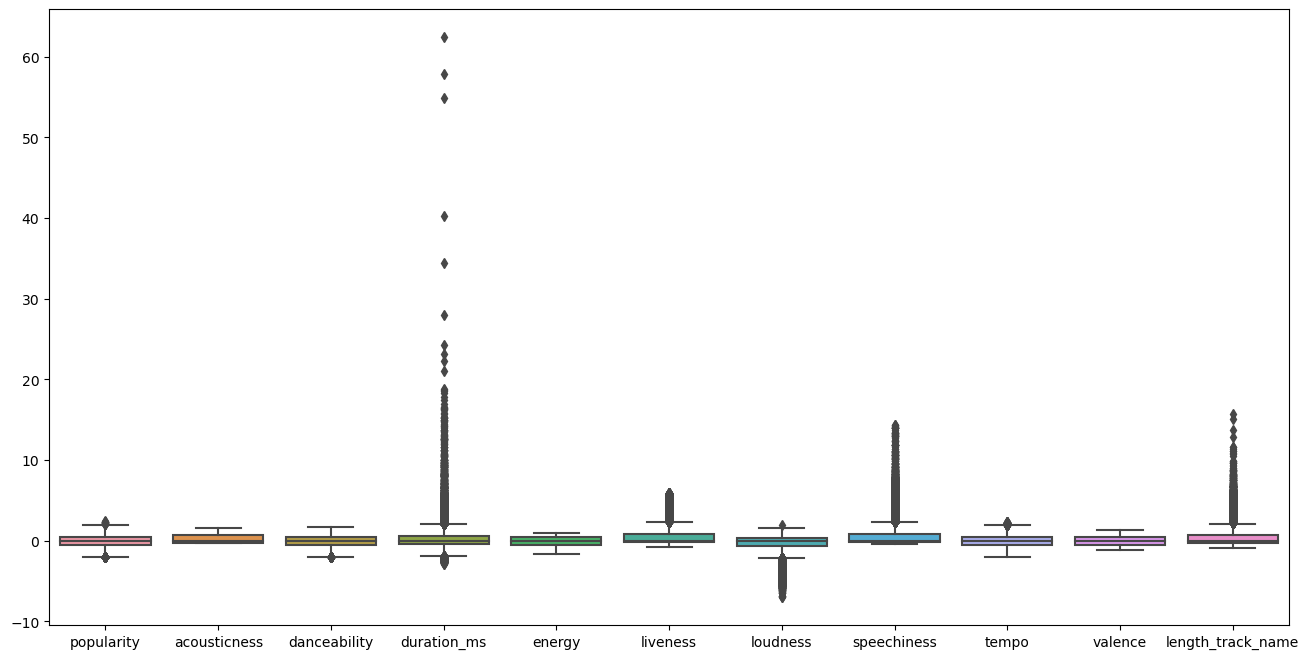

In [78]:


numerical_feats = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
                   'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'length_track_name']

plt.figure(figsize=(16,8))
sns.boxplot(data=X_scaled[numerical_feats])
plt.show()



As can be clearly seen, some features, especially the duration feature, contain extreme ouliers. These outliers can hinder the success of all models, so we'll remove them.

In [80]:


X_no_outliers = X_scaled[(np.abs(zscore(X_scaled[numerical_feats])) < 4).all(axis=1)]
y_no_outliers = y[X_no_outliers.index]



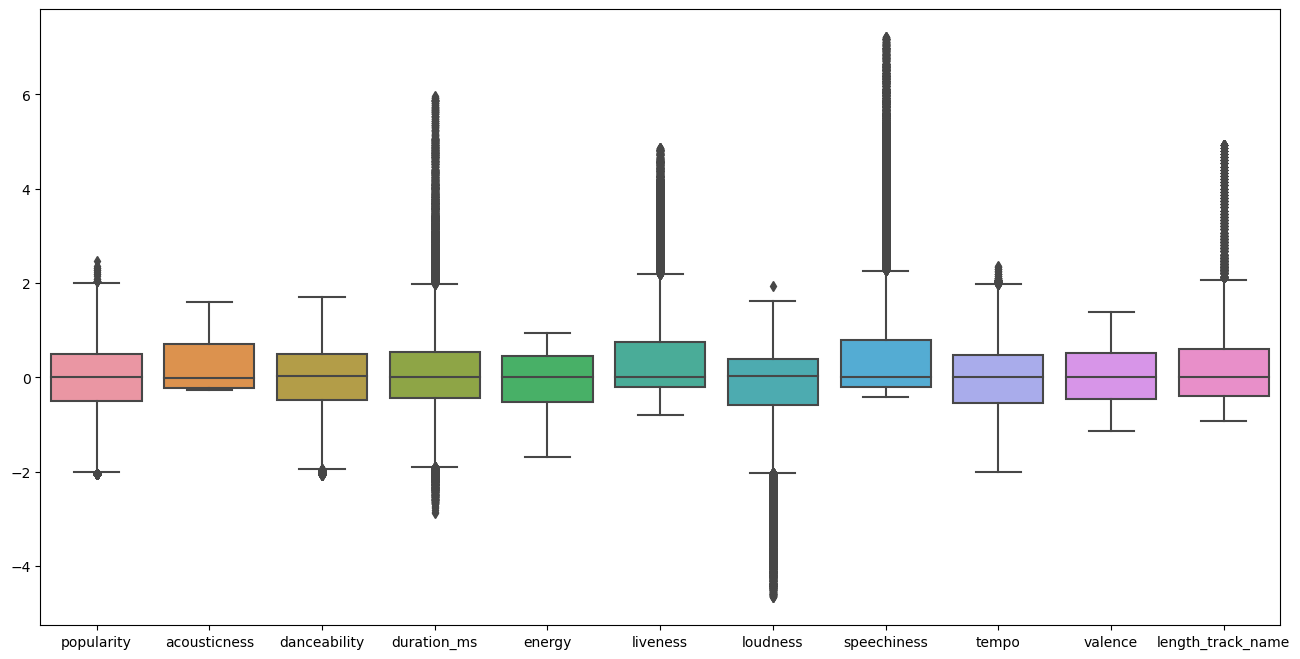

In [81]:
plt.figure(figsize=(16,8))
sns.boxplot(data=X_no_outliers[numerical_feats])
plt.show()



(Note: Some of the features are clearly skewed. However, using log/boxcox on them did not improve the final results, and so it is ommitted here)


Check correlation and reduce dimensionality with PCA:

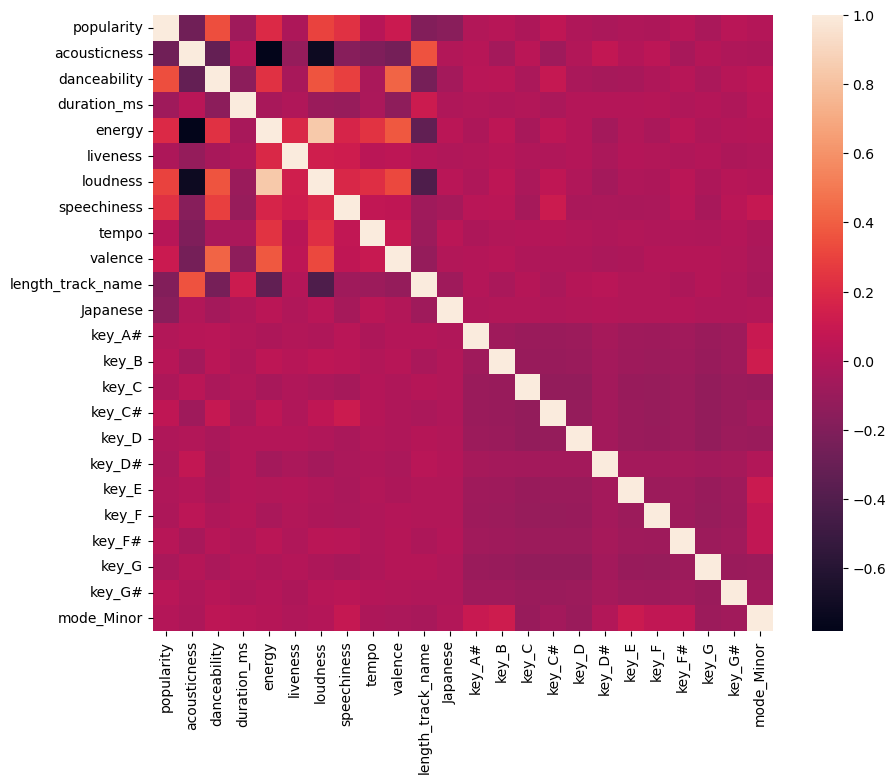

In [85]:


plt.figure(figsize=(10,8))
sns.heatmap(X_no_outliers.corr(), annot=False)
plt.show()




Let's zoom in on the upper left corner where there are some noticeable correlations:


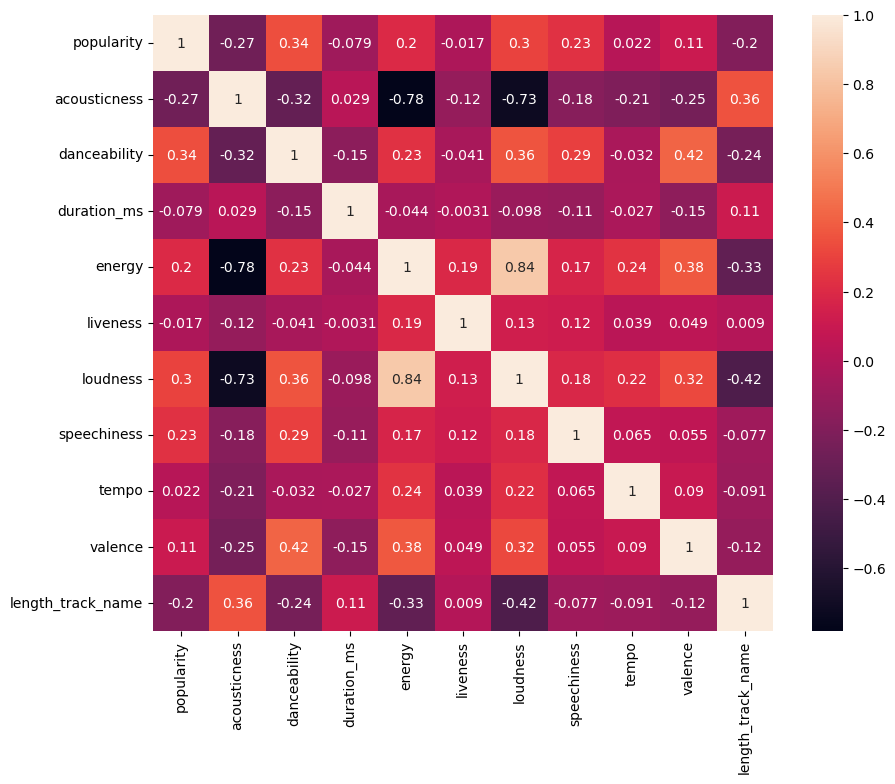

In [86]:


plt.figure(figsize=(10,8))
sns.heatmap(X_no_outliers.iloc[:,:11].corr(), annot=True)
plt.show()




Loudness, Acousticness and energy are highly correlated. PCA will address this while also reducing the dimesionality of our data set.¶


In [88]:
pca = PCA().fit(X_no_outliers)

# find the first n components that account for 95% of the variance 
cum_exp_var = np.cumsum(pca.explained_variance_ratio_)
n_components = (cum_exp_var <= 0.95).sum()

X_pca = pca.transform(X_no_outliers)[:,:n_components]

In [89]:


x_train, x_test, y_train, y_test = train_test_split(X_pca, y_no_outliers, test_size=0.3)



In [92]:
def get_metrics(model, X, y, y_names):
    clf = model

    X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.3)

    clf.fit(X_train, y_train)

    predict_train = clf.predict(X_train)
    predict_valid = clf.predict(X_valid)

    print(f"Train accuracy score: {accuracy_score(y_train, predict_train)*100:2.4}%")
    print(f"Validation accuracy score: {accuracy_score(y_valid, predict_valid)*100:2.4}%\n")

    print('Classification Report for the validation set:\n')
    print(classification_report(y_valid, predict_valid, target_names=y_names))
    print('Confusion Matrix:\n')
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion_matrix(y_valid, predict_valid), annot = True, fmt = ".0f", 
                cmap = "coolwarm", linewidths = 1, linecolor = "white",
                xticklabels = y_names, yticklabels = y_names)
    plt.show()

SVC

Train accuracy score: 59.35%
Validation accuracy score: 54.32%

Classification Report for the validation set:

              precision    recall  f1-score   support

 Alternative       0.40      0.35      0.37      1047
       Anime       0.74      0.73      0.73      1051
       Blues       0.53      0.46      0.49       967
   Classical       0.84      0.80      0.82       867
     Country       0.52      0.52      0.52      1024
  Electronic       0.57      0.55      0.56       992
     Hip-Hop       0.43      0.47      0.45      1017
        Jazz       0.51      0.48      0.49      1062
         Rap       0.43      0.41      0.42      1003
        Rock       0.54      0.68      0.60      1081

    accuracy                           0.54     10111
   macro avg       0.55      0.55      0.55     10111
weighted avg       0.54      0.54      0.54     10111

Confusion Matrix:



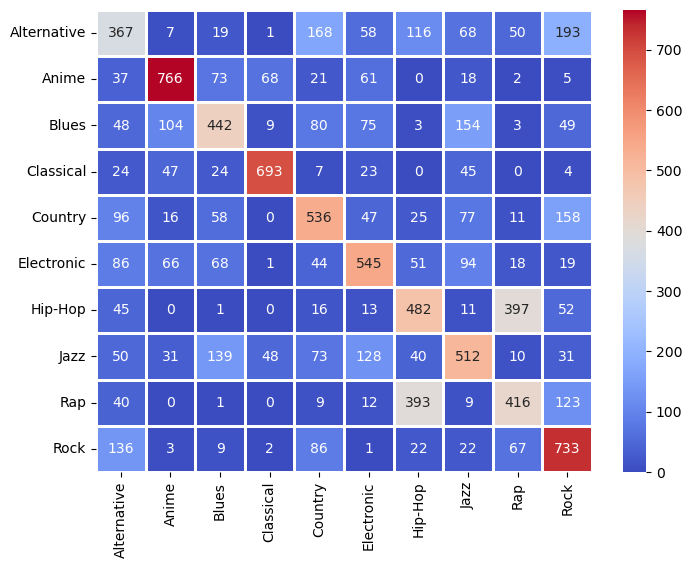

In [93]:
get_metrics(SVC(), x_train, y_train, y_names)

KNN

Train accuracy score: 61.98%
Validation accuracy score: 44.52%

Classification Report for the validation set:

              precision    recall  f1-score   support

 Alternative       0.26      0.39      0.31      1016
       Anime       0.66      0.65      0.65      1044
       Blues       0.39      0.38      0.38       961
   Classical       0.79      0.77      0.78       889
     Country       0.36      0.46      0.41      1049
  Electronic       0.49      0.38      0.43      1009
     Hip-Hop       0.39      0.45      0.42       999
        Jazz       0.45      0.35      0.39      1038
         Rap       0.36      0.30      0.33      1053
        Rock       0.45      0.36      0.40      1053

    accuracy                           0.45     10111
   macro avg       0.46      0.45      0.45     10111
weighted avg       0.46      0.45      0.45     10111

Confusion Matrix:



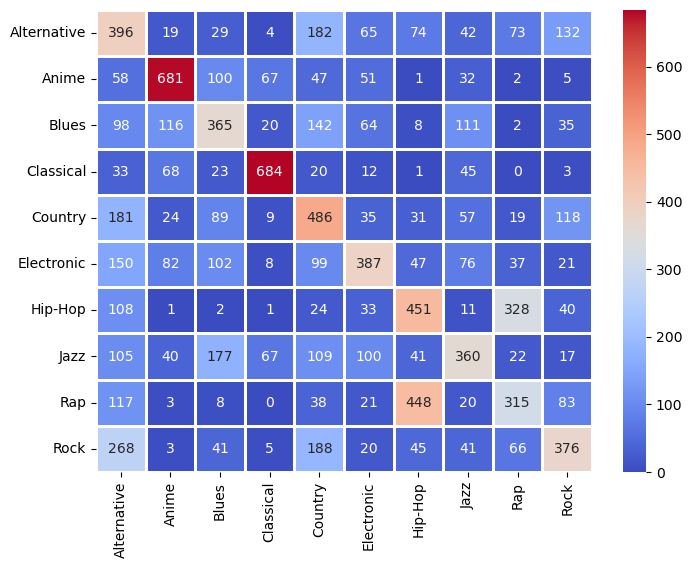

In [94]:
get_metrics(KNeighborsClassifier(), x_train, y_train, y_names)


Random Forest:


Train accuracy score: 98.33%
Validation accuracy score: 49.05%

Classification Report for the validation set:

              precision    recall  f1-score   support

 Alternative       0.35      0.31      0.33      1055
       Anime       0.68      0.71      0.69      1028
       Blues       0.45      0.39      0.42       958
   Classical       0.83      0.77      0.80       848
     Country       0.48      0.49      0.49      1004
  Electronic       0.54      0.53      0.53      1028
     Hip-Hop       0.36      0.39      0.37      1032
        Jazz       0.46      0.45      0.45      1035
         Rap       0.35      0.34      0.35      1065
        Rock       0.47      0.58      0.52      1058

    accuracy                           0.49     10111
   macro avg       0.50      0.50      0.50     10111
weighted avg       0.49      0.49      0.49     10111

Confusion Matrix:



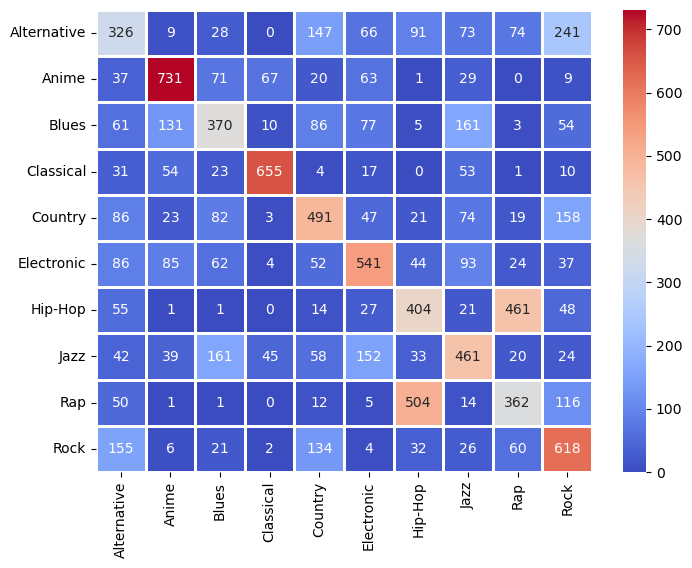

In [96]:
get_metrics(RandomForestClassifier(), x_train, y_train, y_names)



*Note the obviouse overfitting appearant in this case (and in KNN to a lesser degree).


It would appear that all of the models we tried were almost equaly as ineffective (~40-50% accuracy), but SVC does better than the rest and avoids overfitting.
Before we'll analyze further, we'll do a short sanity check and see if this is related to the use of PCA, outlier removal, or if it has to do with the features that we engineered/filled missing values in

Try with less fetures, without PCA, and keeping the outliers in:

Train accuracy score: 56.95%
Validation accuracy score: 54.5%

Classification Report for the validation set:

              precision    recall  f1-score   support

 Alternative       0.43      0.35      0.39      1025
       Anime       0.71      0.65      0.68      1056
       Blues       0.52      0.45      0.48      1016
   Classical       0.78      0.85      0.81      1054
     Country       0.51      0.49      0.50      1074
  Electronic       0.60      0.58      0.59      1039
     Hip-Hop       0.43      0.52      0.47      1062
        Jazz       0.50      0.46      0.48      1072
         Rap       0.44      0.36      0.40      1063
        Rock       0.52      0.75      0.61      1039

    accuracy                           0.54     10500
   macro avg       0.54      0.54      0.54     10500
weighted avg       0.54      0.54      0.54     10500

Confusion Matrix:



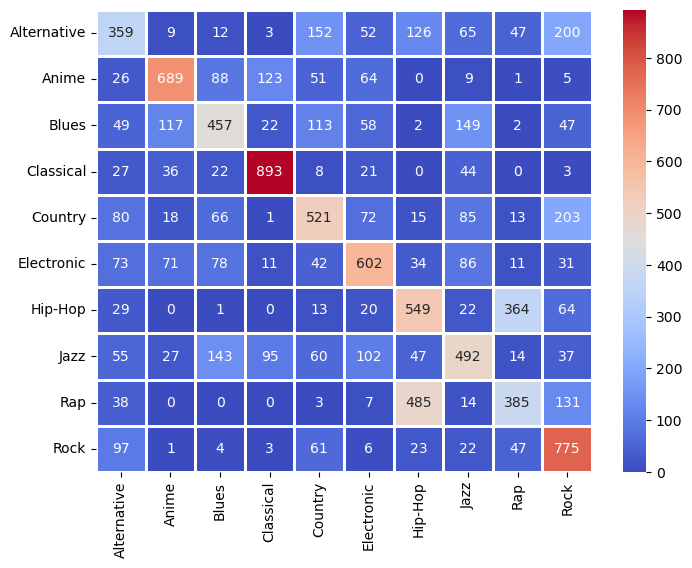

In [98]:


X_reduced = X_scaled.drop(['duration_ms', 'liveness', 'tempo', 'length_track_name', 'Japanese'], axis=1)
x_train_check, x_test_check, y_train_check, y_test_check = train_test_split(X_reduced, y, test_size=0.3)

get_metrics(SVC(), x_train_check, y_train_check, y_names)



This had no effect on the poor performance.

Modeling Summary:

SVM, KNN, and Random Forest models were used on the data set, but all yielded bad results (40-50% accuracy). SVM was the best out of a bad bunch.

Possible effects of outliers, dimensionality reduction and missing values were tested and discarded.

The next section will analyze the results in more depth and propose a solution.

Consolidating classes

An important thing to note is that as we hypothesized from the EDA, one genre, classical music, has much higher precision/recall scores than all the rest. This is also true to a lesser extent regarding the Anime genre.

Meanwhile, Hip-Hop and Rap seem to be interchangeable and can't be distinguished from one another, but they are relatively well separated from the rest of the genres (as evidenced by the confusion matrix).

Rock, Alternative and maybe Country also seem to have some similarity resulting in missclassification. Same goes for Blues and Jazz and maybe Electronic. These combinations are much more tentative, though.